In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## How to use this notebook

**Input**: Read summary statistics table(s) `read_stats.csv` generated by the rule `concat_statistics`. 

**Output**: Grouped bar graph(s) of the number of reads and bases remaining after each quality control step in each sample. 

### Steps

**Usage**: There are 3 cells that require user customization, described below. I designed this notebook specifically for the test dataset but tried to generalize as much as possible. Each of these cells is indicated with the text `Customize here`. 

1) Add paths to the read summary statistics tables you want to visualize to `stats_lst`.

- More summary tables can be added if you want to aggregate reports from several runs!

2) Customize how the samples are ordered (if applicable) and formally labeled along the graph axes using `samples_ordered` and `samples_labeled` respectively. 

3) Customize the number of bar colours according to the number of steps used in the quality control process using `steps_colours`. 

## Load sample summary tables

In [2]:
# Set seaborn plotting aesthetics as default
sns.set()

In [4]:
# Customize here
(# Add read summary statistics tables in a list
stats_lst = ['test_data/test_out/short_read_qc/final_reports/read_stats.csv']
)
# If applicable, rename the samples in the table and/or set display names
samples_ordered = ['uhgg']
samples_labeled = ['UHGG'] # Optional- can also be merged_df['sample_name']

In [5]:
# Merge the summary table dataframes and check their contents
df_lst = []
for df in stats_lst:
    df_lst.append(pd.read_csv(df, header = 0))
merged_df = pd.concat(df_lst)

merged_df

,sample_name,step,num_reads,prop_init_reads,total_size,prop_init_size,mean_read_len
0,uhgg,0_begin,229834,1.000000,34475100,1.000000,150.0
1,uhgg,0_lowqual_removal,226054,0.983553,33908100,0.983553,150.0
2,uhgg,1_adapter_removal,226054,0.983553,33907993,0.983550,150.0
3,uhgg,2_host_removal,214222,0.932073,32133193,0.932070,150.0
4,uhgg,3_error_removal,214210,0.932021,32131393,0.932017,150.0


# Read Summary Stats Dataviz

In [7]:
# Customize here
# The number of step colours is equal to the number of steps used in the quality control
# process, with one more at the beginning for the raw dataset
steps_named = ['Low Qual. Removal', 'Adapter Removal', 'Host Read Removal', 'Base-by-base Corr.']
steps_colours = ['#ffa600', '#ff6361', '#bc5090', '#58508d', '#003f5c']

## Numbers of reads and bases at all stages for each sample

In [25]:
def grouped_bar_plot(df, c, a):
    parameter = 'num_reads' if c == 'Reads' else 'total_size'
    # Customize here: If there are multiple samples, add `order = samples_ordered` to the barplot command
    p = sns.barplot(data = df, x = 'sample_name', y = parameter, hue = 'step', \
                    palette = steps_colours, ax = a) 
    p.set_xticklabels(samples_labeled, size = 12) # Relabel each of the groups
    p.set(xlabel = None)
    p.set_ylabel('Num. ' + c, size = 16)
    p.get_legend().remove()
    return p

In [29]:
%%capture
# To suppress figure output
# Define plotting region
# Rows:    1.
# Columns: 2. Column 1 graphs the numbers of reads. Column 2 graphs the number of bases.
col_labels = ['Reads', 'Bases']
fig, axs = plt.subplots(1, len(col_labels), figsize = (24,12)) # in inches

In [30]:
for i,c in enumerate(col_labels):
    grouped_bar_plot(merged_df, c, axs[i])

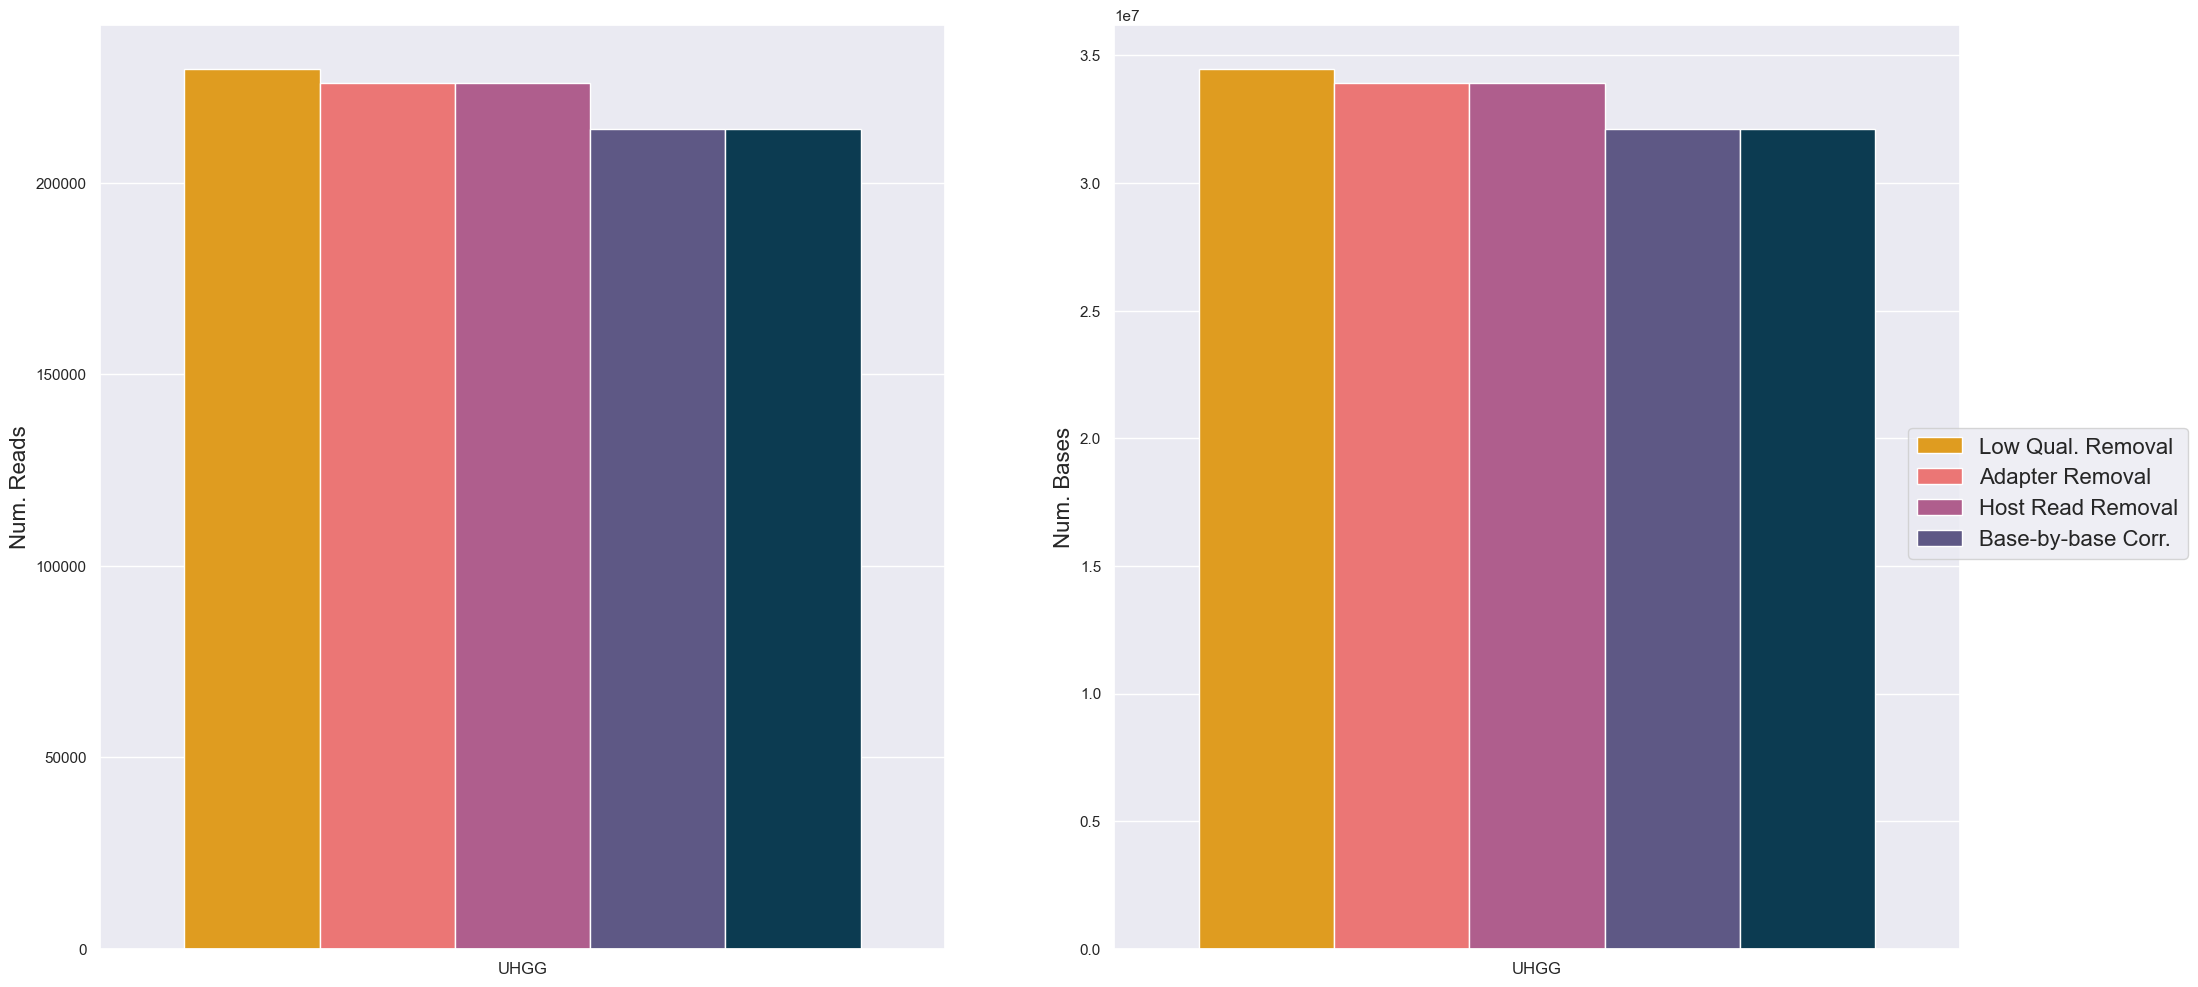

In [31]:
# Add a global legend referring to all and plot the graph
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, steps_named, loc = 'center right', fontsize = 16)
fig

In [32]:
# Save a large SVG without padding
fig.savefig('num_reads_bases_step.svg', dpi = 1000, bbox_inches = 'tight')